# Credit Card Fraud Detection
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
#Loading the required dataset
df = pd.read_csv('creditcard.csv', encoding ='ISO-8859-1')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
#Performing a basic NULL Check
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Initial observations
- The Class column is the Target Column
- It has got 0 showing legit transaction and 1 showing a fraudulent transaction

In [5]:
print(df.Class.unique())

[0 1]


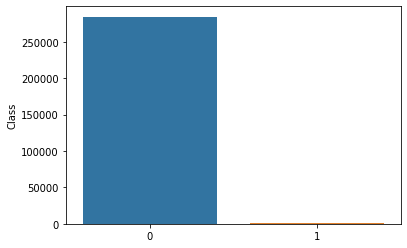

In [6]:
sns.barplot(df.Class.value_counts().index, df.Class.value_counts())


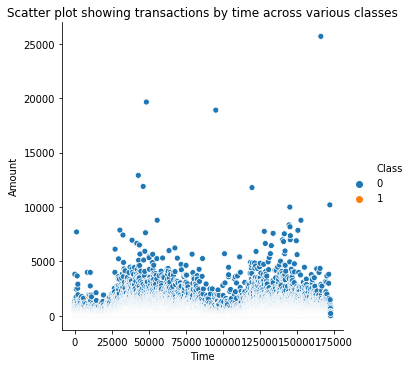

In [7]:
sns.relplot('Time','Amount', data = df, hue = 'Class')
plt.title('Scatter plot showing transactions by time across various classes')
plt.show()

As shown above we can se that the cases of fraudulent transactions are very few.

In [8]:
round(sum(df.Class == 1)/sum(df.Class == 0) * 100, 2)

0.17

- The ratio of the fraudulent to the legit transaction is :  __*0.17*__ <br>
*which is a good thing as the number of legitimate transactions are high*

- Analyzing the amount column

In [9]:
print('The total of the amount of transactions done in the dataframe is :',round(df.Amount.sum(),2))

The total of the amount of transactions done in the dataframe is : 25162590.01


In [10]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
bins = range(0,174000,1000)
df['binned'] = pd.cut(df.Time,bins)

In [12]:
bins

range(0, 174000, 1000)

In [13]:
df.groupby('binned').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
binned,,,,,,,,,,,,,,,,,,,,,
"(0, 1000]",487.740310,-0.202428,0.234003,0.878482,0.260519,-0.031817,0.114625,0.107640,-0.061534,-0.006099,...,-0.010485,-0.118754,-0.043538,-0.001626,0.111750,0.033837,0.014865,-0.010497,66.359636,0.001550
"(1000, 2000]",1456.440841,-0.446171,0.363686,0.781394,0.050418,-0.153320,0.050078,0.115610,-0.069039,0.022408,...,0.038424,-0.209080,-0.034811,0.034493,0.101873,0.087996,0.063942,0.018709,72.381656,0.000000
"(2000, 3000]",2519.598703,-0.389264,0.349293,0.890263,-0.235798,-0.002246,-0.133866,0.206077,-0.166453,0.148554,...,0.012443,0.051827,-0.070518,0.039035,0.062989,-0.138812,0.057565,-0.009252,53.913679,0.000000
"(3000, 4000]",3558.436380,0.166615,0.007296,0.593010,-0.311541,0.182519,0.624566,-0.223087,0.164695,0.474371,...,-0.112880,-0.280907,-0.021964,0.091034,0.105945,-0.212488,0.019326,0.016389,62.950179,0.000000
"(4000, 5000]",4475.392190,-0.385757,0.475663,1.128611,0.691751,-0.003303,0.333199,-0.080255,-0.020516,1.233711,...,-0.101593,-0.246551,-0.027318,0.027909,0.083076,-0.005393,0.005307,0.010116,63.069287,0.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(168000, 169000]",168475.566895,0.108529,0.317005,-0.725295,-0.247344,0.379887,-0.137428,0.135341,-0.016634,-0.009287,...,-0.005067,0.065082,0.040856,-0.021153,-0.164408,0.001815,0.008031,-0.006566,57.444580,0.000000
"(169000, 170000]",169508.072983,0.129053,0.247035,-0.814355,-0.085823,0.319004,-0.125492,0.133008,0.032515,-0.035340,...,0.033950,0.096462,0.024014,0.014554,-0.135039,0.002172,-0.017413,-0.011103,76.787785,0.002561
"(170000, 171000]",170501.580202,0.051666,0.330677,-0.814501,-0.122347,0.279331,-0.120608,0.070375,0.035178,0.001703,...,0.025724,0.107989,0.055397,0.028751,-0.137048,0.007725,-0.002766,0.008061,68.348295,0.000723


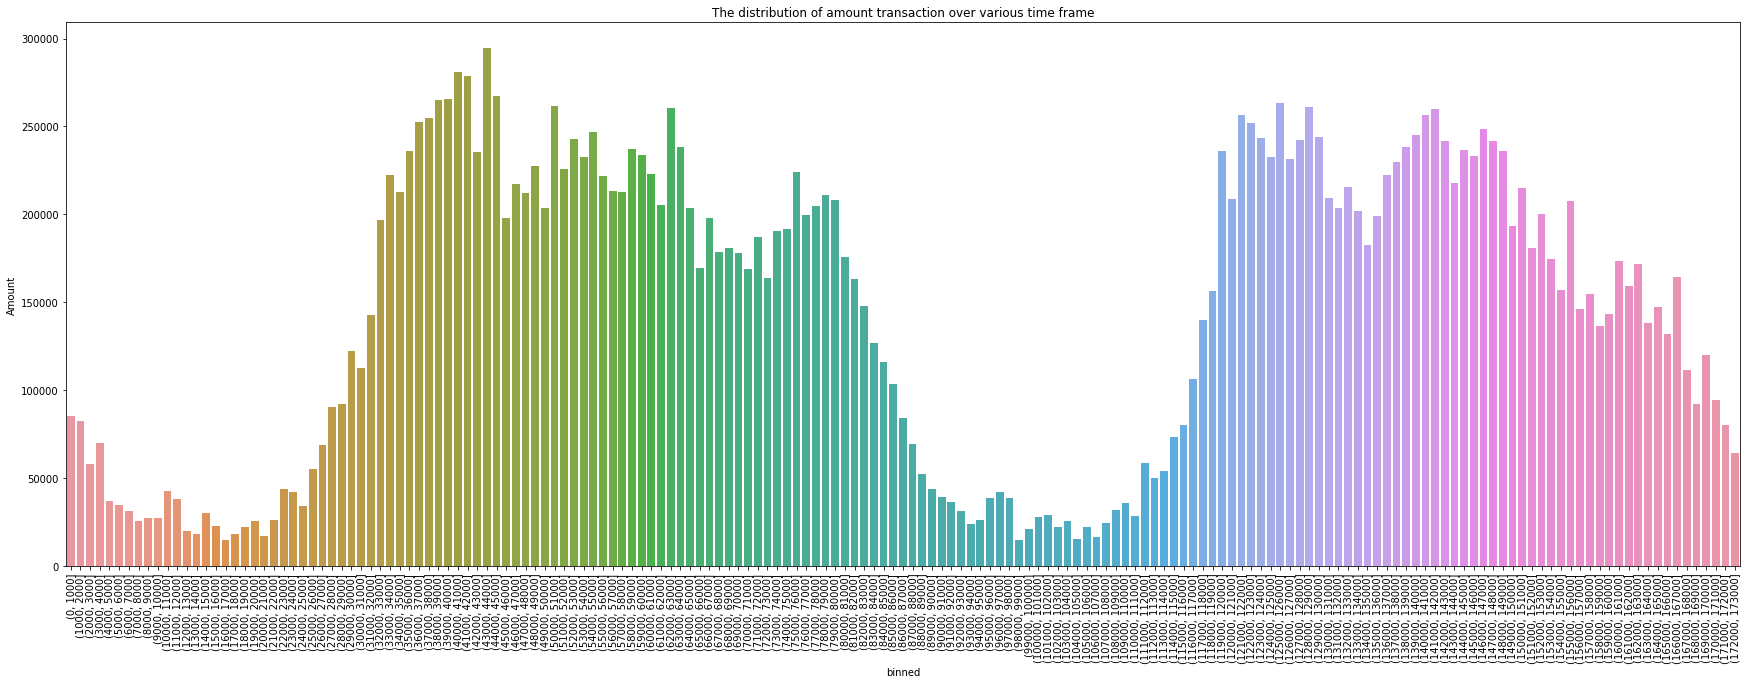

In [14]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.xlabel('Time interval')
plt.title('The distribution of amount transaction over various time frame')
sns.barplot(df.groupby('binned').sum().index,df.groupby('binned').sum().Amount)
plt.show()

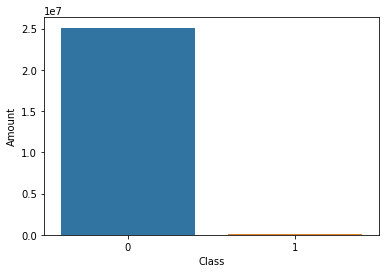

In [15]:
sns.barplot(df.groupby('Class').sum().index,df.groupby('Class').sum().Amount)

The graph shows the total of the amount of transcations done in various time frames

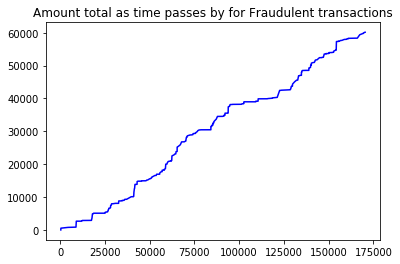

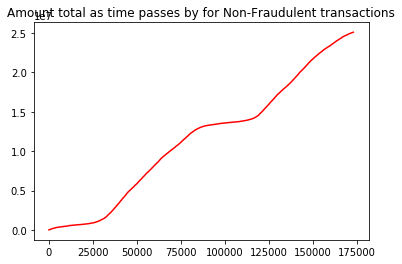

In [16]:
plt.figure()
plt.title('Amount total as time passes by for Fraudulent transactions')
plt.plot(df[df.Class == 1].Time,np.cumsum(df[df.Class == 1].Amount), color = 'Blue')
plt.figure()
plt.title('Amount total as time passes by for Non-Fraudulent transactions')
plt.plot(df[df.Class == 0].Time,np.cumsum(df[df.Class == 0].Amount), color = 'Red')

- As shown in the graph above the sum of the total transactions Amount increases linearly

## Outlier Analysis and Skewness 
We check the columns for their skewness and outliers. Before continuing the EDA further we need to make sure that the data is balanced to demote the oversitting of data.

We notice that the numer of 1s to the number of 0s is not of a resonable ratio.i.e. the class is imbalanced. We make use of __ADASYN__ to solve the data imbalance

In [17]:
df.drop('binned', axis = 1, inplace = True)

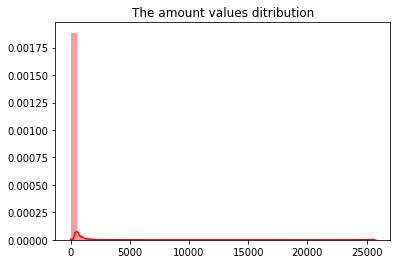

In [18]:
sns.distplot(df.Amount.values, color='r')
plt.title('The amount values ditribution')
plt.show()

Performing outlier analysis of the amount column

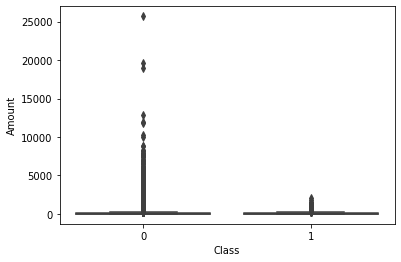

In [19]:
sns.boxplot(df.Class,df.Amount)

As shown above there seems to be a lot of outliers in the non-fraudulent transaction category

In [20]:
df.Amount.describe(percentiles = [0,0.20,.25,.50,.75,.99])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
20%           3.570000
25%           5.600000
50%          22.000000
75%          77.165000
99%        1017.970000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
len(df)

284807

Let us remove the outliers for the *__Amount__* column

In [22]:
from scipy import stats
df[stats.zscore(df.Amount) < 5].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


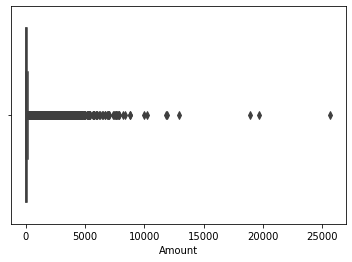

In [23]:
sns.boxplot(df.Amount)

In [24]:
len(df)

284807

In [25]:
df.Amount.describe(percentiles = [0,0.20,.25,.50,.75,.99])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
20%           3.570000
25%           5.600000
50%          22.000000
75%          77.165000
99%        1017.970000
max       25691.160000
Name: Amount, dtype: float64

Scaling the amount column to fit the already PCA transformed scale

In [26]:
df.Amount -= df.Amount.min()
df.Amount /= df.Amount.max()

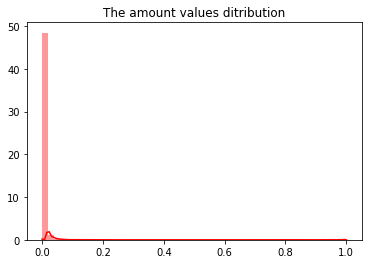

In [27]:
sns.distplot(df.Amount.values, color='r')
plt.title('The amount values ditribution')
plt.show()

In [28]:
#Checking if any 1s were lost in the analysis
df.Class.unique()

array([0, 1], dtype=int64)

Analyzing the time column

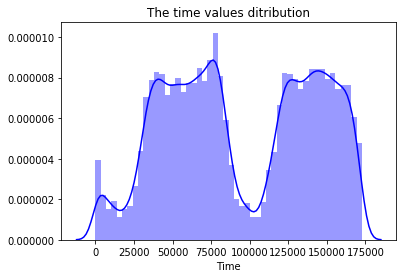

In [29]:
sns.distplot(df.Time, color='b')
plt.title('The time values ditribution')
plt.show()

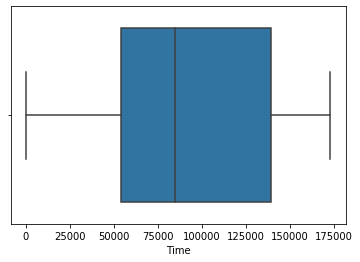

In [30]:
sns.boxplot(df.Time)

No outliers in the time column

In [31]:
df.Time -= df.Time.min()
df.Time /= df.Time.max()

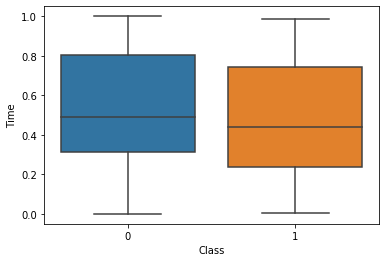

In [32]:
sns.boxplot(df.Class,df.Time)

We are ging to analyze the remainder of the columns 

We know that the columns have been PCA transformed. So they have been scaled. We will analyze the PCA columns for skewness

In [33]:
df_rem = df.drop(['Amount','Time','Class'], axis = 1)
df_rem.skew()
df_rem.kurtosis()

V1      32.486679
V2      95.773106
V3      26.619551
V4       2.635455
V5     206.904560
V6      42.642494
V7     405.607417
V8     220.586974
V9       3.731311
V10     31.988239
V11      1.633921
V12     20.241870
V13      0.195300
V14     23.879462
V15      0.284769
V16     10.419131
V17     94.799719
V18      2.578341
V19      1.724970
V20    271.016113
V21    207.287040
V22      2.832967
V23    440.088659
V24      0.618871
V25      4.290412
V26      0.919006
V27    244.989241
V28    933.397502
dtype: float64

In [34]:
df_rem.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric. <br>
__*we are going to try an d keep the data skew between -1 to +1*__

In [35]:
mod_cols = df_rem.skew()[np.abs(df_rem.skew()) < 1]
mod_cols

V4     0.676292
V9     0.554680
V11    0.356506
V13    0.065233
V15   -0.308423
V18   -0.259880
V19    0.109192
V22   -0.213258
V24   -0.552499
V25   -0.415793
V26    0.576693
dtype: float64

We see the above the above columns are in an acceptable range of -1 to +1

In [36]:
for col in mod_cols.index:
    print('Kurtosis '+col,df_rem[col].kurtosis())

Kurtosis V4 2.6354549146787125
Kurtosis V9 3.731310614141207
Kurtosis V11 1.6339212577978683
Kurtosis V13 0.19529978783246627
Kurtosis V15 0.28476908376068266
Kurtosis V18 2.5783408337335967
Kurtosis V19 1.7249697812275109
Kurtosis V22 2.8329665163717817
Kurtosis V24 0.6188707999933452
Kurtosis V25 4.290412283119672
Kurtosis V26 0.919005770879612


The skew of V4 is: 0.676292097985747


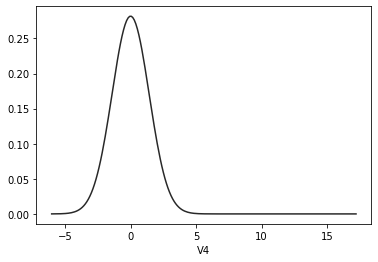

The skew of V9 is: 0.5546797719063509


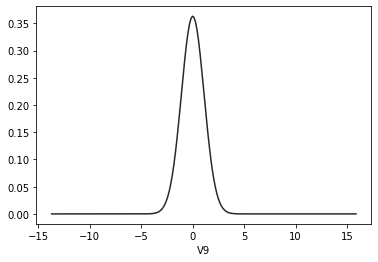

The skew of V11 is: 0.35650585548882024


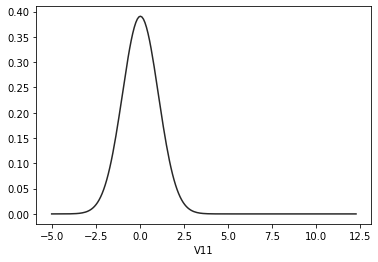

The skew of V13 is: 0.06523345790658323


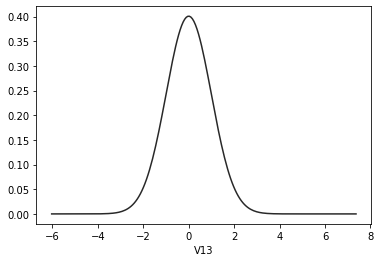

The skew of V15 is: -0.308422982135924


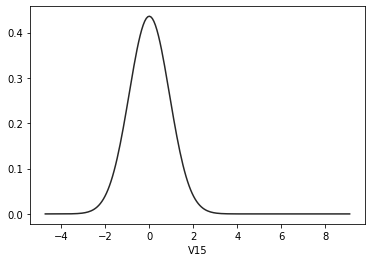

The skew of V18 is: -0.25988026809430603


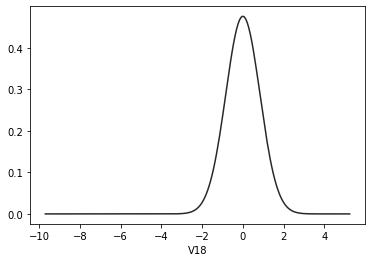

The skew of V19 is: 0.10919175998147107


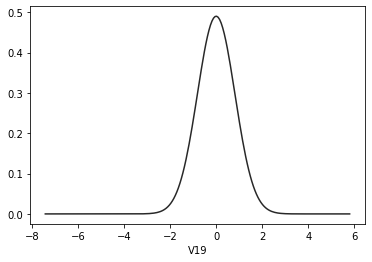

The skew of V22 is: -0.21325762284328822


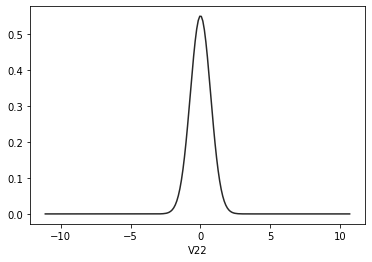

The skew of V24 is: -0.5524993011673045


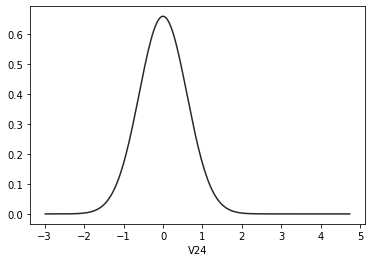

The skew of V25 is: -0.41579259031563515


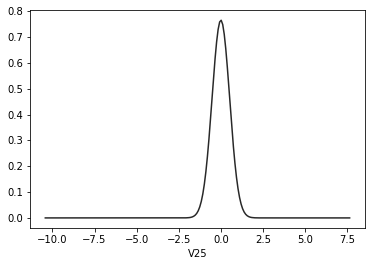

The skew of V26 is: 0.5766926172084218


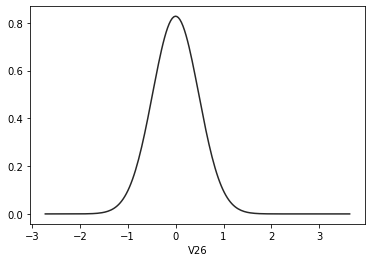

In [37]:
from scipy.stats import norm
for col in mod_cols.index:
    print('The skew of '+col+' is:',df_rem[col].skew())
    plt.figure()
    sns.distplot(df_rem[col], fit = norm, kde=False, hist = False)
    plt.show()

In [38]:
cols1 = mod_cols.index
cols1

Index(['V4', 'V9', 'V11', 'V13', 'V15', 'V18', 'V19', 'V22', 'V24', 'V25',
       'V26'],
      dtype='object')

In [39]:
cols = df_rem.columns
cols



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [40]:
skew_cols = cols.difference(cols1)
skew_cols

Index(['V1', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V20', 'V21', 'V23',
       'V27', 'V28', 'V3', 'V5', 'V6', 'V7', 'V8'],
      dtype='object')

# Skew of the various columns that have excess skew in graphs

The skew of V1 is: -3.280667302756041


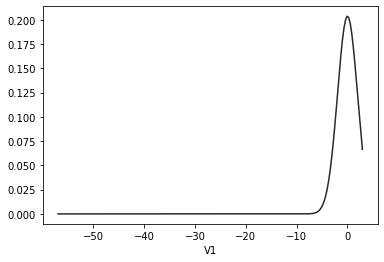

The skew of V10 is: 1.1871405899625276


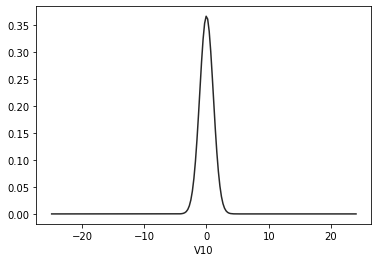

The skew of V12 is: -2.2784009354106174


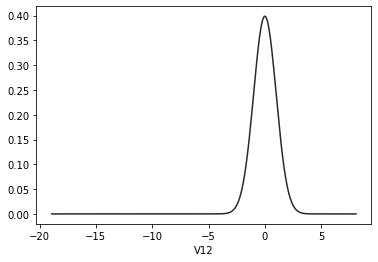

The skew of V14 is: -1.9951758402683304


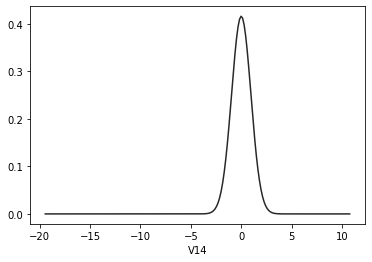

The skew of V16 is: -1.100966276051066


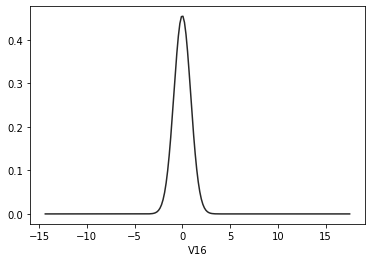

The skew of V17 is: -3.844914473870619


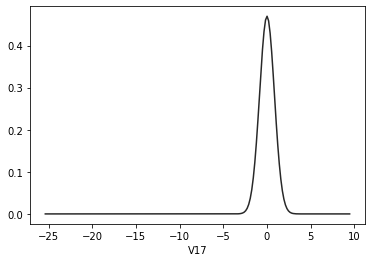

The skew of V2 is: -4.624865573285336


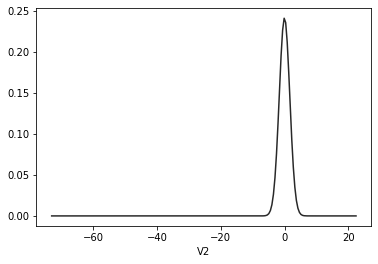

The skew of V20 is: -2.037155299081398


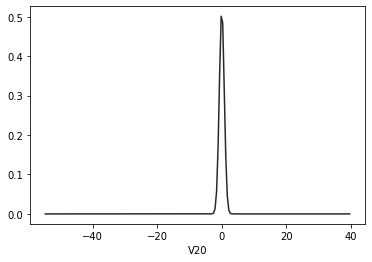

The skew of V21 is: 3.5929911930778453


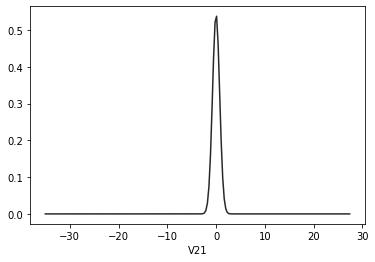

The skew of V23 is: -5.875140340106818


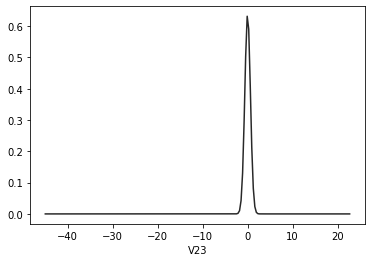

The skew of V27 is: -1.170208942432713


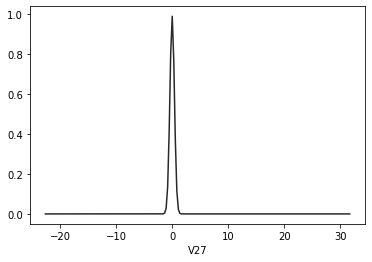

The skew of V28 is: 11.192091192212809


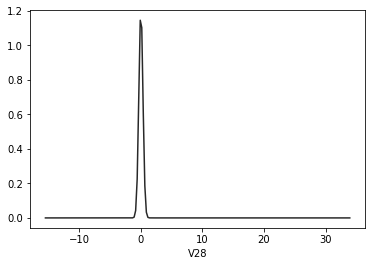

The skew of V3 is: -2.240155440240421


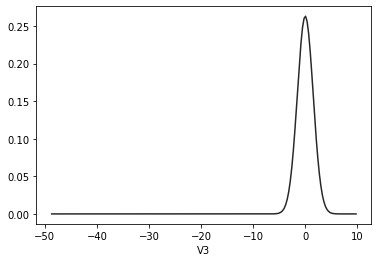

The skew of V5 is: -2.4259014959520533


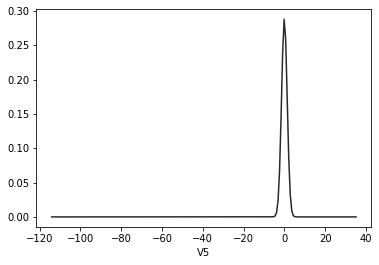

The skew of V6 is: 1.826580664998085


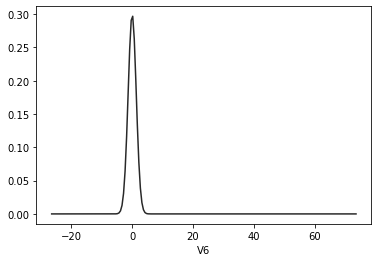

The skew of V7 is: 2.553907417429514


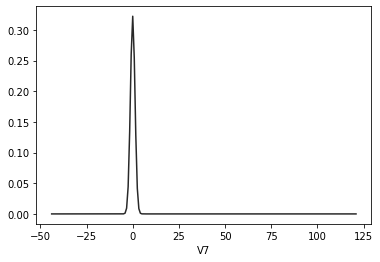

The skew of V8 is: -8.521944194777976


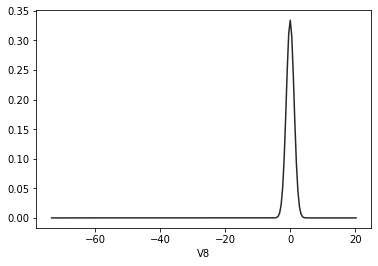

In [41]:
from scipy.stats import kurtosis, skew
from scipy.stats import norm

for col in skew_cols:
    print('The skew of '+col+' is:',df_rem[col].skew())
    plt.figure()
    sns.distplot(df_rem[col], fit = norm, kde=False, hist = False)
    plt.show()


We are going to treat such columns using the power transformer function

In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)

In [43]:
skewd = pd.DataFrame(pt.fit_transform(df[skew_cols]))
skewd.columns = skew_cols
df[skew_cols] = skewd

### Skew of the columns that had excess skew

The skew of V1 is: -0.21800334938871546
The skew of V10 is: -1.318333772491346
The skew of V12 is: 0.1589324794125469
The skew of V14 is: 0.10596569742432513
The skew of V16 is: 0.13743721274926274
The skew of V17 is: -0.791140983241196
The skew of V2 is: 0.3348517642081771
The skew of V20 is: -0.9236529584128133
The skew of V21 is: -1.9668632101055161
The skew of V23 is: -0.24920882421390309
The skew of V27 is: 3.4650311249563237
The skew of V28 is: 1.0691926355218613
The skew of V3 is: -0.07998005432231563
The skew of V5 is: -1.1701002606628357
The skew of V6 is: -1.9374685207793383
The skew of V7 is: 2.5945746319114047
The skew of V8 is: 2.2975901064886997


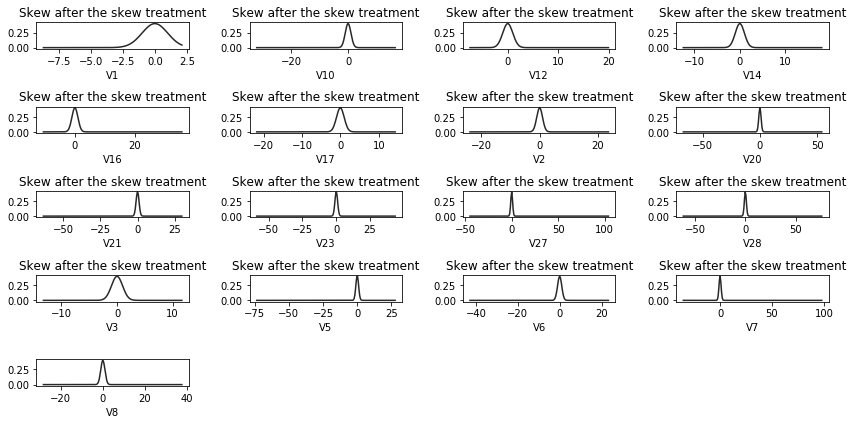

In [44]:
from scipy.stats import kurtosis, skew
from scipy.stats import norm

plt.figure(figsize=(12,6))
skew_cols = list(skew_cols)

for col in skew_cols:
    plt.title('Skew after the skew treatment')
    print('The skew of '+col+' is:',df[col].skew())
    plt.subplot(5,4,skew_cols.index(col)+1)    
    sns.distplot(df[col], fit = norm, kde=False, hist = False)
plt.tight_layout()

In [45]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,...,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0.005824,0
1,0.000000,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,...,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0.000105,0
2,0.000006,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,...,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0.014739,0
3,0.000006,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,...,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0.004807,0
4,0.000012,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,...,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0.002724,0


We see that except for V1 the remainder have significant difference between their 95% and their max. We go ahead and cap the all the columns to their 99% percntile value

In [46]:
len(df)

284807

In [47]:
df[skew_cols]

,V1,V10,V12,V14,V16,V17,V2,V20,V21,V23,V27,V28,V3,V5,V6,V7,V8
0,-0.904815,0.127074,-0.774671,-0.404755,-0.600774,0.215544,-0.131503,0.323559,-0.007670,-0.189647,0.323027,-0.053332,2.176074,-0.256110,0.459227,0.193516,0.020305
1,0.626390,-0.115195,1.296242,-0.232720,0.491958,-0.175639,0.093067,-0.093203,-0.298760,0.153342,-0.035793,0.057491,-0.035062,0.031947,0.045846,-0.063874,0.006711
2,-0.904242,0.234324,-0.104954,-0.255865,-2.809663,1.383126,-0.871858,0.680896,0.357879,1.501808,-0.151417,-0.173752,1.381297,-0.374492,1.320901,0.639714,0.172348
3,-0.742857,-0.008922,0.026987,-0.381222,-1.194700,-0.829186,-0.202760,-0.273184,-0.133275,-0.317680,0.144087,0.201524,1.401049,-0.019151,0.983351,0.191907,0.309141
4,-0.823641,0.718432,0.496185,-1.168769,-0.580731,-0.319406,0.530197,0.528646,0.004660,-0.232990,0.541488,0.669838,1.160592,-0.305614,0.187360,0.479194,-0.331706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-3.432267,3.576063,4.513387,6.636511,1.366639,2.599479,9.263793,1.931151,0.310938,1.680751,2.440121,2.460015,-4.220558,-3.762096,-2.490441,-3.973235,10.735004
284803,-0.639272,-0.918591,1.056661,-0.760490,-0.850454,-0.069378,-0.120145,0.073879,0.311960,0.008840,0.158566,-0.154346,1.646499,0.625614,0.862874,0.019492,0.221646
284804,1.309171,-0.423945,-0.108344,-0.602451,0.087492,0.346990,-0.274801,-0.001752,0.336217,-0.072038,-0.002183,-0.070437,-1.858341,1.945994,2.010160,-0.240095,0.674598
284805,-0.395844,-0.339755,-1.053638,0.433222,-0.744928,0.595704,0.277522,0.162076,0.381266,-0.274423,0.260400,0.333581,0.391172,-0.284612,0.572506,-0.554756,0.641383


In [48]:
df[skew_cols].describe([0.95,0.99])

,V1,V10,V12,V14,V16,V17,V2,V20,V21,V23,V27,V28,V3,V5,V6,V7,V8
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.672378e-17,-2.035775e-17,-1.277349e-17,2.474863e-17,5.313971e-18,-1.975899e-17,7.983430e-19,2.794201e-18,-4.390887e-18,8.781773e-18,-1.247411e-18,4.490679e-19,-1.373150e-16,2.395029e-17,1.397100e-17,-7.983430e-19,-3.392958e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-8.474209e+00,-3.185279e+01,-7.242896e+00,-1.218038e+01,-1.024272e+01,-2.154597e+01,-2.371418e+01,-6.683669e+01,-6.327021e+01,-5.864168e+01,-4.459955e+01,-6.138567e+01,-1.301749e+01,-7.329386e+01,-4.255940e+01,-3.515221e+01,-2.807450e+01
50%,-2.489598e-01,-4.477494e-02,-1.874869e-02,-2.450001e-02,-1.579541e-03,-1.172153e-01,-4.167429e-02,-8.464112e-02,-2.316512e-02,-2.948935e-02,-9.972324e-03,4.673230e-02,-2.512616e-02,-5.108320e-02,-1.140057e-01,3.224257e-02,-5.537799e-02
95%,1.473203e+00,1.389581e+00,1.593749e+00,1.642404e+00,1.679884e+00,1.605422e+00,1.254188e+00,1.088785e+00,7.470271e-01,7.918560e-01,9.743200e-01,7.932896e-01,1.674932e+00,1.544970e+00,2.078663e+00,1.138000e+00,1.073847e+00
99%,1.635390e+00,2.742429e+00,2.414230e+00,2.709574e+00,2.504575e+00,3.023818e+00,2.970719e+00,3.171310e+00,2.535343e+00,2.531274e+00,2.407185e+00,1.639869e+00,2.386098e+00,2.548721e+00,2.609936e+00,2.180263e+00,2.383889e+00
max,1.868337e+00,1.628497e+01,1.971832e+01,1.775099e+01,3.534714e+01,1.404085e+01,2.342550e+01,5.389903e+01,2.963924e+01,4.332679e+01,1.038741e+02,7.561008e+01,1.143255e+01,2.750233e+01,2.306058e+01,9.768921e+01,3.740342e+01


In [49]:
len(df)

284807

The skew of V1 is: -0.21800334938871546


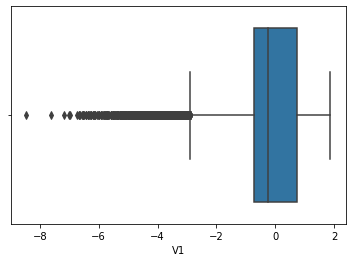

The skew of V10 is: -1.318333772491346


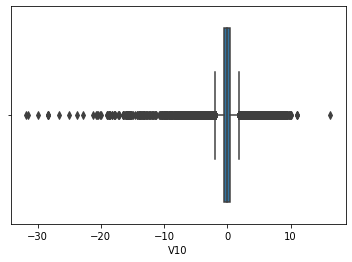

The skew of V12 is: 0.1589324794125469


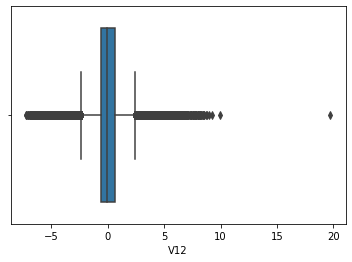

The skew of V14 is: 0.10596569742432513


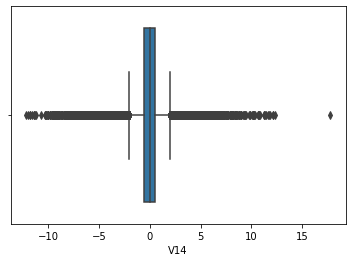

The skew of V16 is: 0.13743721274926274


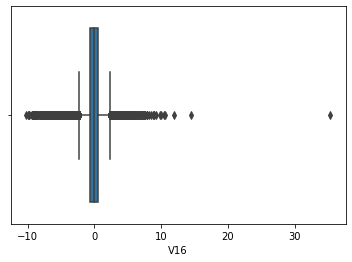

The skew of V17 is: -0.791140983241196


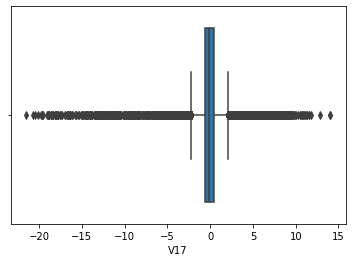

The skew of V2 is: 0.3348517642081771


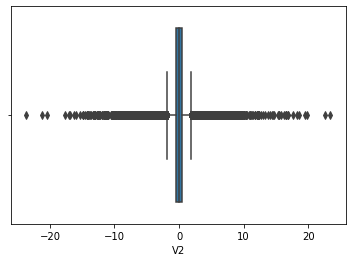

The skew of V20 is: -0.9236529584128133


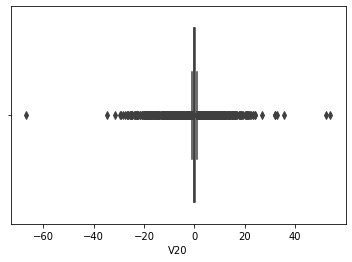

The skew of V21 is: -1.9668632101055161


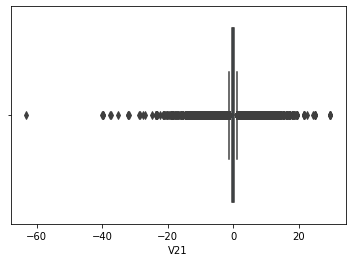

The skew of V23 is: -0.24920882421390309


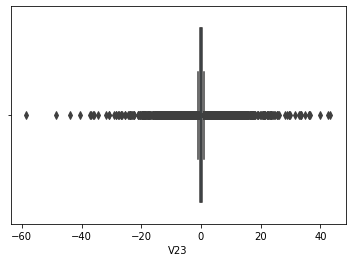

The skew of V27 is: 3.4650311249563237


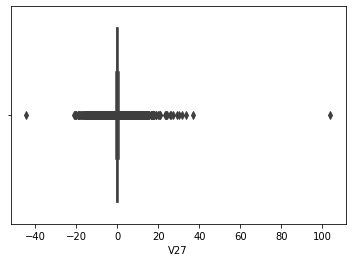

The skew of V28 is: 1.0691926355218613


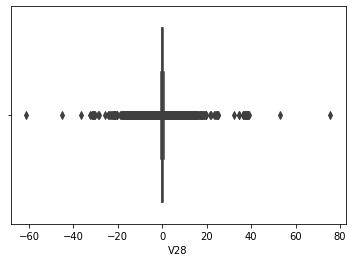

The skew of V3 is: -0.07998005432231563


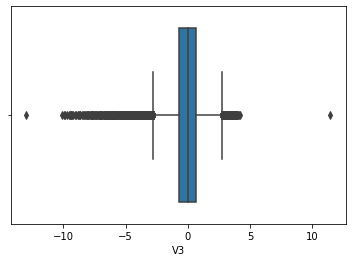

The skew of V5 is: -1.1701002606628357


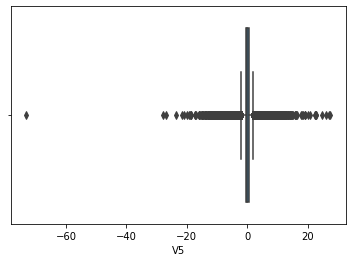

The skew of V6 is: -1.9374685207793383


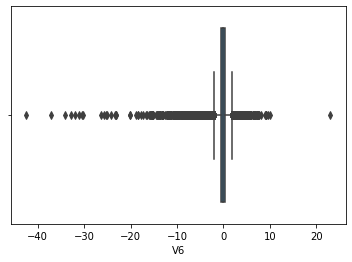

The skew of V7 is: 2.5945746319114047


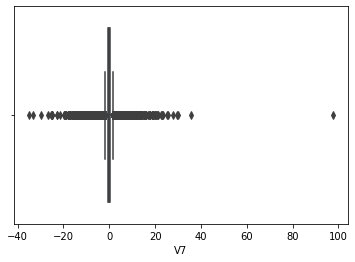

The skew of V8 is: 2.2975901064886997


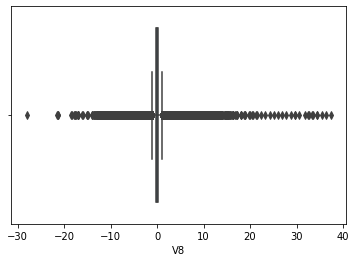

In [50]:
from scipy.stats import kurtosis, skew
from scipy.stats import norm

for col in skew_cols:
    print('The skew of '+col+' is:',df[col].skew())
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

In [51]:
df[(stats.zscore(df_rem[skew_cols].drop('V1', axis = 1)) < 3).all(axis=1)]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,...,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0.005824,0
1,0.000000,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,...,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0.000105,0
2,0.000006,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,...,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0.014739,0
3,0.000006,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,...,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0.004807,0
4,0.000012,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,...,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.999959,-0.185962,0.569891,-0.510693,-0.745097,0.820109,-0.081572,0.656906,0.036761,-0.204064,...,-0.424384,-0.808520,0.070353,0.102800,-0.435870,0.124079,0.537702,0.224091,0.000105,0
284803,0.999971,-0.639272,-0.120145,1.646499,-0.738589,0.625614,0.862874,0.019492,0.221646,0.584800,...,0.311960,0.924384,0.008840,-1.016226,-0.606624,-0.395255,0.158566,-0.154346,0.000965,0
284804,0.999977,1.309171,-0.274801,-1.858341,-0.557828,1.945994,2.010160,-0.240095,0.674598,0.432454,...,0.336217,0.578229,-0.072038,0.640134,0.265745,-0.087371,-0.002183,-0.070437,0.002642,0
284805,0.999977,-0.395844,0.277522,0.391172,0.689799,-0.284612,0.572506,-0.554756,0.641383,0.392087,...,0.381266,0.800049,-0.274423,0.123205,-0.569159,0.546668,0.260400,0.333581,0.000389,0


The skew of V1 is: -3.280667302756041
The skew of V10 is: 1.1871405899625276
The skew of V12 is: -2.2784009354106174
The skew of V14 is: -1.9951758402683304
The skew of V16 is: -1.100966276051066
The skew of V17 is: -3.844914473870619
The skew of V2 is: -4.624865573285336
The skew of V20 is: -2.037155299081398
The skew of V21 is: 3.5929911930778453
The skew of V23 is: -5.875140340106818
The skew of V27 is: -1.170208942432713
The skew of V28 is: 11.192091192212809
The skew of V3 is: -2.240155440240421
The skew of V5 is: -2.4259014959520533
The skew of V6 is: 1.826580664998085
The skew of V7 is: 2.553907417429514
The skew of V8 is: -8.521944194777976


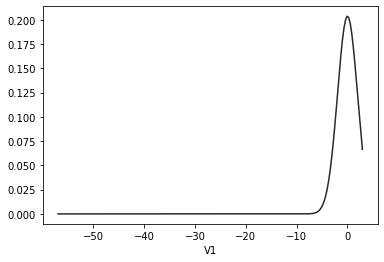

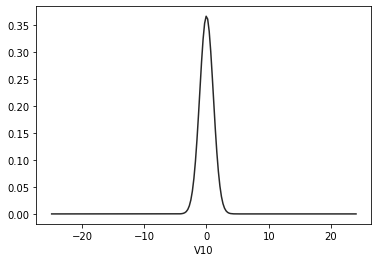

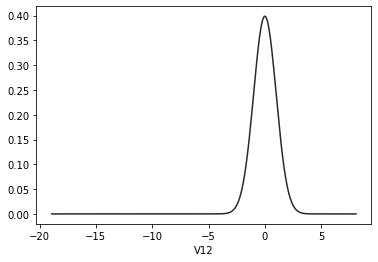

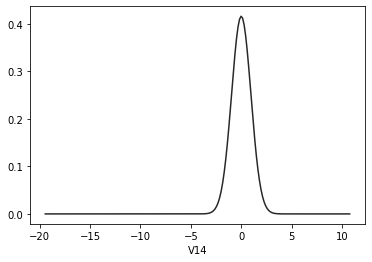

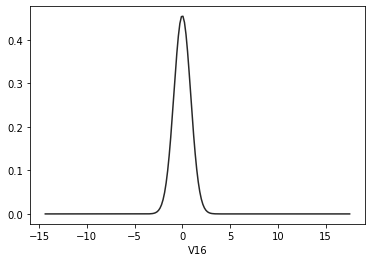

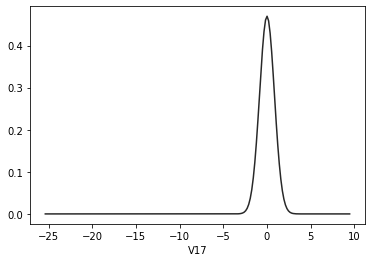

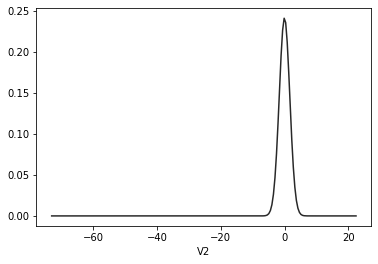

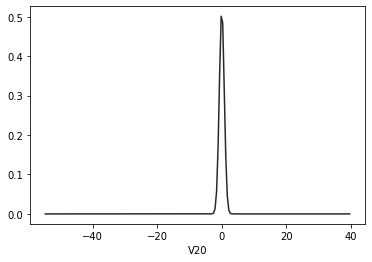

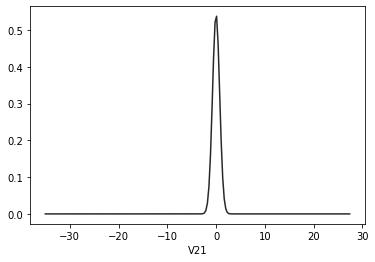

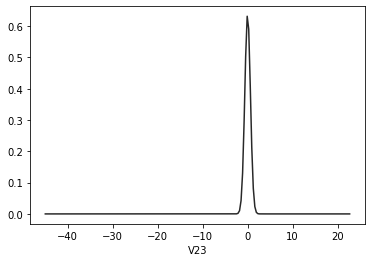

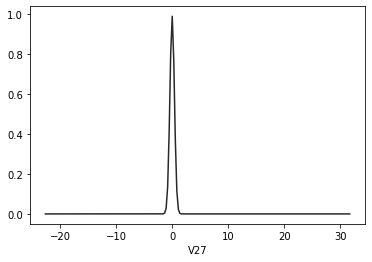

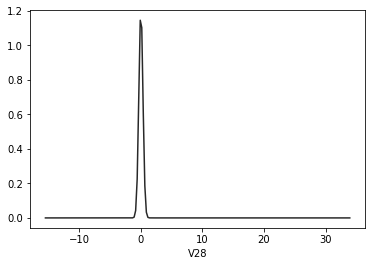

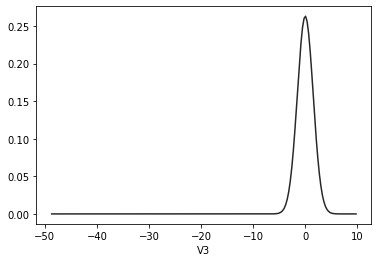

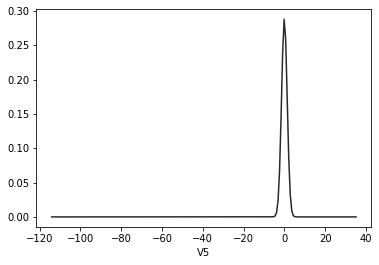

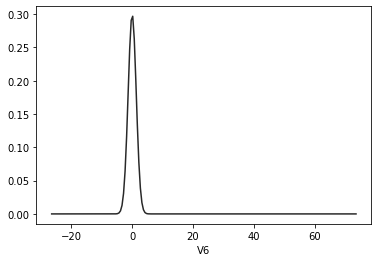

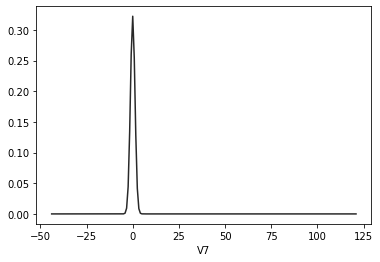

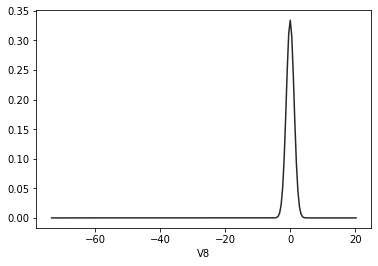

In [52]:
from scipy.stats import kurtosis, skew
from scipy.stats import norm

for col in skew_cols:
    print('The skew of '+col+' is:',df_rem[col].skew())
    plt.figure()
    sns.distplot(df_rem[col], fit = norm, kde=False, hist = False)
    #print('The kurtosis of '+col+' is:',df_rem[col].kurtosis())


In [53]:
df.Class[df.Class == 1].sum()

492

In [54]:
for col in df_rem.columns:
    print(df_rem[col].describe(percentiles = [0.25,.5,.75,.99]))

count    2.848070e+05
mean     1.165980e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
99%      2.237130e+00
max      2.454930e+00
Name: V1, dtype: float64
count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
99%      3.801811e+00
max      2.205773e+01
Name: V2, dtype: float64
count    2.848070e+05
mean    -1.373150e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
99%      2.728434e+00
max      9.382558e+00
Name: V3, dtype: float64
count    2.848070e+05
mean     2.086869e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%      7.433413e-01
99%      4.248032e+00
max      1.687534e+01
Name: V4, dtype: float64
count    2.848070e+05
mean     9.604066e-16
std      1.380247e+00
min     -1.137433e+02
25%     -6.915971e-0

Since the number of fraudlent transactions are extremely low we need to use data balancing techniques to resolve the issue. We can either under sample or over sample. Since the number of __fraudulent transactions__ is limited to __*0.17*__,i.e. the data size is too small, undersampling will lead to a loss of information and hence we over sample it

In [55]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.4.5.
The scikit-learn version is 0.22.1.


In [56]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN()
X,y = sm.fit_sample(df.drop('Class', axis = 1), df.Class)
X.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,...,0.323559,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0.005824
1,0.000000,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,...,-0.093203,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0.000105
2,0.000006,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,...,0.680896,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0.014739
3,0.000006,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,...,-0.273184,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0.004807
4,0.000012,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,...,0.528646,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0.002724


In [57]:
df_adj = pd.DataFrame(X)

In [58]:
df_adj = pd.concat([df_adj,y], axis = 1)

After the __ADASYN__ we check the percentage of the 1s to 0s again <br>
The df_adj represents the new  data set that has been treated using __ADASYN__

In [66]:
sum(df_adj.Class.astype(int) == 1)/sum(df_adj.Class.astype(int) == 0)

0.9998698626523398

*The value turns out to be 99.99 which is a good sign that the dataset is now balanced*

Performing EDA on the oversampled dataset

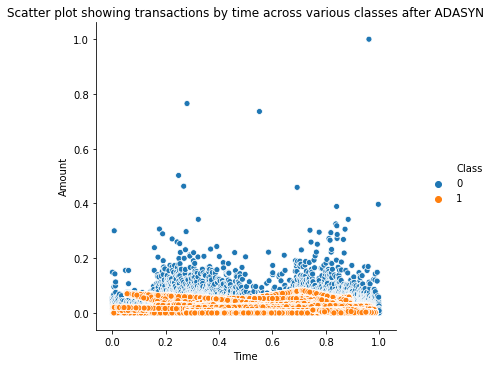

In [59]:
sns.relplot('Time','Amount', data = df_adj, hue = 'Class')
plt.title('Scatter plot showing transactions by time across various classes after ADASYN')
plt.show()

Distribution of classes as per __ADASYSN__

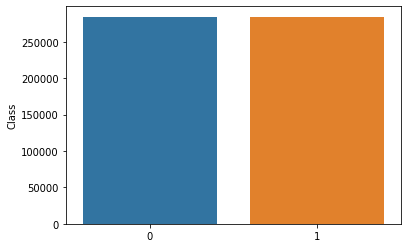

In [67]:
sns.barplot(df_adj.Class.value_counts().index, df_adj.Class.value_counts())

We will be comparing the difference in the data set generated from __ADASYN__ and __SMOTE__

##### Creating a dataset via SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X,y = sm.fit_sample(df.drop('Class', axis = 1), df.Class)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,...,0.323559,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0.005824
1,0.000000,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,...,-0.093203,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0.000105
2,0.000006,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,...,0.680896,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0.014739
3,0.000006,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,...,-0.273184,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0.004807
4,0.000012,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,...,0.528646,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0.002724


In [61]:
df_smote = pd.DataFrame(X)


In [62]:
sum(y.isnull())

0

In [63]:
df_smote = pd.concat([df_smote,y], axis = 1)

In [64]:
sum(df_smote.Class.astype(int) == 1)/sum(df_smote.Class.astype(int) == 0)

1.0

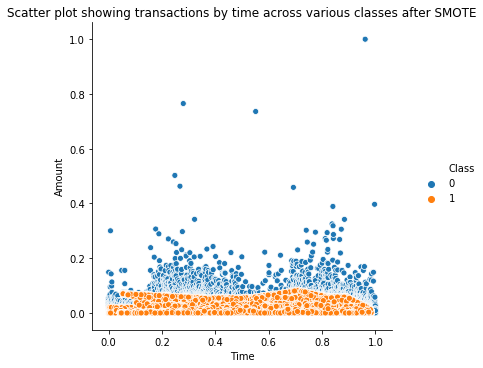

In [65]:
sns.relplot('Time','Amount', data = df_smote, hue = 'Class')
plt.title('Scatter plot showing transactions by time across various classes after SMOTE')
plt.show()

The distribution of classes as per the SMOTE dataset

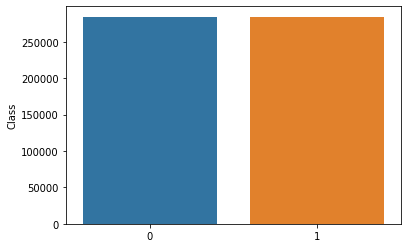

In [68]:
sns.barplot(df_smote.Class.value_counts().index, df_smote.Class.value_counts())

As we know with ADASYSN, the number of synthetic samples that it will add will have a density distribution, whereas, for SMOTE, the distribution will be uniform. Therefore with ADASYN, the synthetic data for minority examples will be harder to learn and hence would be better for modelling.

We will ADASYN dataset for our modelling.

In [69]:
df_adj

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,...,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0.005824,0
1,0.000000,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,...,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0.000105,0
2,0.000006,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,...,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0.014739,0
3,0.000006,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,...,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0.004807,0
4,0.000012,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,...,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568588,0.935391,0.906040,0.149854,-1.235251,0.320238,0.771972,-0.064519,0.232906,-0.104468,0.346362,...,-0.263508,-0.419870,-0.027857,-0.131856,0.035297,-0.122218,0.067399,-0.010998,0.001207,1
568589,0.856840,0.165005,0.351737,-0.723661,0.182590,0.672928,-0.218125,0.315044,-0.044083,-0.013929,...,-0.343645,-0.614027,0.128008,0.363757,-0.397375,0.138345,0.181421,0.027149,0.000509,1
568590,0.795566,1.260640,-0.151809,-1.304036,0.384358,0.367676,-0.435821,0.237132,-0.329130,0.787004,...,-0.264416,-0.496924,0.098846,0.332054,0.028390,-0.132297,-0.058476,0.026529,0.004051,1
568591,0.830461,-0.083851,0.419534,-0.551858,0.136365,0.639667,-0.269709,0.342628,-0.023804,-0.134922,...,-0.370557,-0.679229,0.180350,0.530195,-0.542676,0.225848,0.219713,0.039960,0.000274,1


Now that the data imbalance is sorted let us chek for their outliers

In [70]:
df_adj.drop('Class', axis = 1).skew() 

Time       0.108089
V1        -0.950143
V2         3.943551
V3        -1.935499
V4         0.626702
V5        -3.225950
V6        -1.883268
V7        -3.187941
V8         6.775974
V9        -0.393761
V10       -2.887749
V11        2.019135
V12       -1.005024
V13        0.163542
V14       -1.352671
V15       -0.224572
V16       -1.452578
V17       -1.573104
V18       -1.724108
V19       -0.054359
V20       -0.085375
V21        1.694523
V22       -0.238105
V23       -5.729497
V24       -0.459668
V25       -0.547723
V26        1.001695
V27        1.354924
V28        0.155634
Amount    10.099215
dtype: float64

In [71]:
len(df_adj)

568593

As seen above there is visible reduction in skewness of the data

## Model Buildiing

### Base Model - Logistic Regression

In [72]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [73]:
#creating a function for evaluation of the model
from sklearn.metrics import confusion_matrix
def CalcMetrics(y_test,y_pred):
    confusion2 = confusion_matrix(y_test,y_pred)
    TP = confusion2[1,1] # true positive 
    TN = confusion2[0,0] # true negatives
    FP = confusion2[0,1] # false positives
    FN = confusion2[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity',TP / float(TP+FN))
    #The ability to predict the True positives from the false positives is very low
    print('Precision',TP/ float(TP+FP))
    print(classification_report(y_test, y_pred))

In [74]:
#test train split
train,test = train_test_split(df_adj, test_size = 0.3)
X_train = train.drop('Class', axis = 1 )
y_train = train.Class
X_test = test.drop('Class', axis = 1 )
y_test = test.Class

In [75]:
X_train.shape

(398015, 30)

In [76]:
y_train.shape

(398015,)

### RFE for feature selection

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False  True  True  True False False False  True  True  True  True
  True False  True False  True  True  True False False False  True  True
 False  True  True  True  True  True]
[ 1  4  1  1  1  7  5  8  1  1  1  1  1  6  1  3  1  1  1  2 10  9  1  1
 11  1  1  1  1  1]


In [78]:
#selected features
X_train.columns[rfe.support_]

Index(['Time', 'V2', 'V3', 'V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [79]:
col = X_train.columns[rfe.support_]

In [80]:
# runningthe model using the selected variables
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
model = logreg1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398015
Model:                            GLM   Df Residuals:                   397994
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 04 Apr 2020   Deviance:                          nan
Time:                        14:23:53   Pearson chi2:                 1.38e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4978      0.018    -82.092      0.000      -1.534      -1.462
Time          -1.5376      0.030    -50.598      0.000      -1.597      -1.478
V2            -0.7404      0.012    -59.705      0.000      -0.765      -0.716
V3            -0.6979      0.009    -78.346      0.000      -0.715      -0.680
V4             1.2901      0.006    203.853      0.000       1.278       1.303
V8            -1.1194      0.009   -118.531      0.000      -1.138      -1.101
V9            -0.4797      0.007    -64.413      0.000      -0.494      -0.465
V10           -1.6188      0.014   -119.389      0.000      -1.645      -1.592
V11            0.9728      0.009    110.494      0.000       0.956       0.990
V12           -1.4807      0.011   -134.939      0.000      -1.502      -1.459
V14           -1.8286      0.011   -162.209      0.000      -1.851      -1.807
V16           -0.8881      0.010    -92.753      0.000      -0.907      -0.869
V17           -1.1338      0.013    -85.722      0.000      -1.160      -1.108
V18           -0.2070      0.010    -21.372      0.000      -0.226      -0.188
V22            0.4327      0.009     47.943      0.000       0.415       0.450
V23           -0.2347      0.005    -51.278      0.000      -0.244      -0.226
V25           -0.2976      0.012    -24.121      0.000      -0.322      -0.273
V26           -0.5547      0.013    -42.496      0.000      -0.580      -0.529
V27            0.2489      0.008     30.854      0.000       0.233       0.265
V28            0.2738      0.009     31.187      0.000       0.257       0.291
Amount       -41.4968      0.937    -44.273      0.000     -43.334     -39.660
==============================================================================
"""

From above, we can see all the variables are significant with acceptable p values. We can now check their VIFs for multicollinearity.

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,V10,5.87
11,V17,5.49
9,V14,4.95
10,V16,4.05
1,V2,4.05
12,V18,3.98
2,V3,3.55
7,V11,3.22
4,V8,3.17
8,V12,3.02


VIFs are also okay with none of them much higher than 5.

We can go ahead and make predictions

In [86]:
#prediction
X_test_rfe = pd.DataFrame(data = X_test).iloc[:, rfe.support_]
y_pred = logsk.predict(X_test_rfe)

In [88]:
#evaluation
CalcMetrics(y_test,y_pred)

Sensitivity 0.8615332221622003
Precision 0.9006568043705113
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     85424
           1       0.90      0.86      0.88     85154

    accuracy                           0.88    170578
   macro avg       0.88      0.88      0.88    170578
weighted avg       0.88      0.88      0.88    170578



We can see that we are getting a sensitivity or recall as 86%. But we believe that we can improve this further by using ensemble models. And we will try them next

In [89]:
print(confusion_matrix(y_test, y_pred))

[[77332  8092]
 [11791 73363]]


In [85]:
X_train.shape

(398015, 30)

In [90]:
y_test.shape

(170578,)

### k-NN Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
#predictions
y_pred_k = model.predict(X_test)

In [107]:
#evaluation
CalcMetrics(y_test,y_pred_k)

Sensitivity 1.0
Precision 0.9977152632133944
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85424
           1       1.00      1.00      1.00     85154

    accuracy                           1.00    170578
   macro avg       1.00      1.00      1.00    170578
weighted avg       1.00      1.00      1.00    170578



In [108]:
print(confusion_matrix(y_test, y_pred_k))

[[85229   195]
 [    0 85154]]


from above, we can see we are getting very good results with k-NN classifier. Lets try other models as well.

### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
#predictions
y_pred_d = model.predict(X_test)

In [111]:
#evaluation
CalcMetrics(y_test,y_pred_d)

Sensitivity 0.9979566432580971
Precision 0.9976754561036888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85424
           1       1.00      1.00      1.00     85154

    accuracy                           1.00    170578
   macro avg       1.00      1.00      1.00    170578
weighted avg       1.00      1.00      1.00    170578



In [112]:
print(confusion_matrix(y_test, y_pred_d))

[[85226   198]
 [  174 84980]]


Again, we are getting good results with Decision tree. Lets now try random forest

### Random Forest

In [113]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [114]:
#running random forest with default parameters 
rfc = RandomForestClassifier()

In [115]:
# Fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
# Making predictions
y_pred = rfc.predict(X_test)

In [117]:
#evaluation
CalcMetrics(y_test,y_pred)

Sensitivity 1.0
Precision 0.9997769246122598
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85424
           1       1.00      1.00      1.00     85154

    accuracy                           1.00    170578
   macro avg       1.00      1.00      1.00    170578
weighted avg       1.00      1.00      1.00    170578



The above seeems to be very good evaluation for the model where we are getting a sensitivity of 1

In [118]:
print(confusion_matrix(y_test, y_pred))

[[85405    19]
 [    0 85154]]


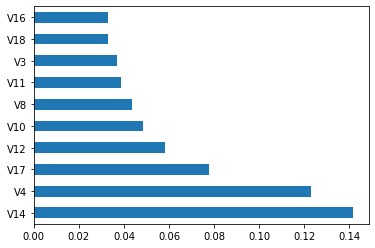

In [119]:
# Plot Important Features predicted by model.
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')


### Gradient Boosting

In [98]:
# Importing gradient boosting classifier from sklearn library
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gbc = GradientBoostingClassifier()

In [100]:
# Fit
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [101]:
# Predict
predictions_gbc = gbc.predict(X_test)

In [102]:
CalcMetrics(y_test, predictions_gbc)

Sensitivity 0.9800009394743641
Precision 0.9606976342600587
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     85424
           1       0.96      0.98      0.97     85154

    accuracy                           0.97    170578
   macro avg       0.97      0.97      0.97    170578
weighted avg       0.97      0.97      0.97    170578



So Gradient Boost is not as good as Random Forest or k-NN

### Summary of Models

So we could see that the best evaluation we got was from Random forest, k-NN and Decision tree models.

However amongst these three, the best model is still Random forest which has highest sensitivity, specificity and F1 score and also the confusion matrix.

hence we will use random forest for our cost benefit analysis.



### Cost - Benefit Analysis

In [120]:
#confusion matrix for random forest
print(confusion_matrix(y_test, y_pred))

[[85405    19]
 [    0 85154]]


Total fraud predictions = TP + FP = 85154 + 19 = 85173

Savings (total amount of correct predictions made) = TP* Cost of each txn correctly predicted

Savings = 85154 * 10 = INR 851540

Loss(total amount of incorrect predictions made) = FN * Cost of each txn incorrectly predicted

Loss = 0 * 10 = INR 0

__Net Savings__ = 851540 - 0 = INR 851540
